In [1]:
from keras import layers, models
from sklearn import preprocessing
from keras.models import Model
from keras.utils import np_utils 
from keras.callbacks import ModelCheckpoint
import tensorflow.keras as tk
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Using TensorFlow backend.
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
(X_train, y_train), (X_test, y_test) = tk.datasets.data.load_data()
scaler = preprocessing.MinMaxScaler() 

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min 
# 위와 같은 식을 통해 연속형 변수를 0~1로 변환



AttributeError: module 'keras.api._v2.keras.datasets' has no attribute 'data'

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
Nin = 13
Nh = 5
Nout = 1

x = layers.Input(shape=(Nin,), name='input_x')
hidden = layers.Dense(Nh,activation='relu')(x)
output = layers.Dense(Nout)(hidden)

model = Model(inputs=x, outputs=output)

model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_x (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [47]:

checkpoint=ModelCheckpoint('g:/model-{epoch:04d}.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, epochs=300, batch_size=100, validation_split=0.2, verbose=2, callbacks=[checkpoint])



Epoch 1/300

Epoch 00001: val_loss improved from inf to 81.88197, saving model to g:/model-0001.h5
4/4 - 0s - loss: 124.3932 - val_loss: 81.8820 - 186ms/epoch - 46ms/step
Epoch 2/300

Epoch 00002: val_loss improved from 81.88197 to 75.48653, saving model to g:/model-0002.h5
4/4 - 0s - loss: 74.9098 - val_loss: 75.4865 - 102ms/epoch - 25ms/step
Epoch 3/300

Epoch 00003: val_loss improved from 75.48653 to 72.80666, saving model to g:/model-0003.h5
4/4 - 0s - loss: 64.1653 - val_loss: 72.8067 - 129ms/epoch - 32ms/step
Epoch 4/300

Epoch 00004: val_loss improved from 72.80666 to 69.39986, saving model to g:/model-0004.h5
4/4 - 0s - loss: 61.9116 - val_loss: 69.3999 - 45ms/epoch - 11ms/step
Epoch 5/300

Epoch 00005: val_loss improved from 69.39986 to 50.67756, saving model to g:/model-0005.h5
4/4 - 0s - loss: 53.2152 - val_loss: 50.6776 - 42ms/epoch - 11ms/step
Epoch 6/300

Epoch 00006: val_loss did not improve from 50.67756
4/4 - 0s - loss: 47.7624 - val_loss: 69.4903 - 37ms/epoch - 9ms/st

Epoch 57/300

Epoch 00057: val_loss did not improve from 23.55787
4/4 - 0s - loss: 33.5535 - val_loss: 31.6956 - 35ms/epoch - 9ms/step
Epoch 58/300

Epoch 00058: val_loss did not improve from 23.55787
4/4 - 0s - loss: 27.6795 - val_loss: 25.7799 - 36ms/epoch - 9ms/step
Epoch 59/300

Epoch 00059: val_loss did not improve from 23.55787
4/4 - 0s - loss: 27.6588 - val_loss: 24.8667 - 36ms/epoch - 9ms/step
Epoch 60/300

Epoch 00060: val_loss did not improve from 23.55787
4/4 - 0s - loss: 23.4682 - val_loss: 25.2917 - 28ms/epoch - 7ms/step
Epoch 61/300

Epoch 00061: val_loss improved from 23.55787 to 22.61514, saving model to g:/model-0061.h5
4/4 - 0s - loss: 22.9185 - val_loss: 22.6151 - 46ms/epoch - 11ms/step
Epoch 62/300

Epoch 00062: val_loss did not improve from 22.61514
4/4 - 0s - loss: 23.1117 - val_loss: 22.9473 - 36ms/epoch - 9ms/step
Epoch 63/300

Epoch 00063: val_loss did not improve from 22.61514
4/4 - 0s - loss: 25.0828 - val_loss: 25.9280 - 39ms/epoch - 10ms/step
Epoch 64/300



Epoch 115/300

Epoch 00115: val_loss did not improve from 20.03164
4/4 - 0s - loss: 23.2930 - val_loss: 20.2307 - 33ms/epoch - 8ms/step
Epoch 116/300

Epoch 00116: val_loss improved from 20.03164 to 19.82958, saving model to g:/model-0116.h5
4/4 - 0s - loss: 19.4393 - val_loss: 19.8296 - 75ms/epoch - 19ms/step
Epoch 117/300

Epoch 00117: val_loss did not improve from 19.82958
4/4 - 0s - loss: 20.9783 - val_loss: 20.0471 - 42ms/epoch - 10ms/step
Epoch 118/300

Epoch 00118: val_loss did not improve from 19.82958
4/4 - 0s - loss: 19.5980 - val_loss: 25.8584 - 31ms/epoch - 8ms/step
Epoch 119/300

Epoch 00119: val_loss did not improve from 19.82958
4/4 - 0s - loss: 20.5710 - val_loss: 22.4083 - 36ms/epoch - 9ms/step
Epoch 120/300

Epoch 00120: val_loss did not improve from 19.82958
4/4 - 0s - loss: 21.7150 - val_loss: 24.2452 - 28ms/epoch - 7ms/step
Epoch 121/300

Epoch 00121: val_loss did not improve from 19.82958
4/4 - 0s - loss: 20.2988 - val_loss: 45.3240 - 32ms/epoch - 8ms/step
Epoch 1

Epoch 173/300

Epoch 00173: val_loss did not improve from 18.36996
4/4 - 0s - loss: 18.7134 - val_loss: 19.5894 - 89ms/epoch - 22ms/step
Epoch 174/300

Epoch 00174: val_loss did not improve from 18.36996
4/4 - 0s - loss: 16.5235 - val_loss: 24.9694 - 50ms/epoch - 12ms/step
Epoch 175/300

Epoch 00175: val_loss did not improve from 18.36996
4/4 - 0s - loss: 19.0955 - val_loss: 20.4592 - 44ms/epoch - 11ms/step
Epoch 176/300

Epoch 00176: val_loss did not improve from 18.36996
4/4 - 0s - loss: 23.0831 - val_loss: 20.1259 - 48ms/epoch - 12ms/step
Epoch 177/300

Epoch 00177: val_loss did not improve from 18.36996
4/4 - 0s - loss: 16.4297 - val_loss: 20.3594 - 32ms/epoch - 8ms/step
Epoch 178/300

Epoch 00178: val_loss did not improve from 18.36996
4/4 - 0s - loss: 19.7386 - val_loss: 20.9275 - 35ms/epoch - 9ms/step
Epoch 179/300

Epoch 00179: val_loss did not improve from 18.36996
4/4 - 0s - loss: 16.3135 - val_loss: 18.7331 - 33ms/epoch - 8ms/step
Epoch 180/300

Epoch 00180: val_loss did not

Epoch 233/300

Epoch 00233: val_loss did not improve from 18.21040
4/4 - 0s - loss: 23.4516 - val_loss: 20.1874 - 28ms/epoch - 7ms/step
Epoch 234/300

Epoch 00234: val_loss did not improve from 18.21040
4/4 - 0s - loss: 13.4967 - val_loss: 18.8621 - 33ms/epoch - 8ms/step
Epoch 235/300

Epoch 00235: val_loss did not improve from 18.21040
4/4 - 0s - loss: 13.5933 - val_loss: 62.6435 - 31ms/epoch - 8ms/step
Epoch 236/300

Epoch 00236: val_loss did not improve from 18.21040
4/4 - 0s - loss: 40.1971 - val_loss: 24.6481 - 30ms/epoch - 7ms/step
Epoch 237/300

Epoch 00237: val_loss did not improve from 18.21040
4/4 - 0s - loss: 18.1198 - val_loss: 23.8937 - 30ms/epoch - 7ms/step
Epoch 238/300

Epoch 00238: val_loss did not improve from 18.21040
4/4 - 0s - loss: 15.0011 - val_loss: 20.8804 - 31ms/epoch - 8ms/step
Epoch 239/300

Epoch 00239: val_loss did not improve from 18.21040
4/4 - 0s - loss: 13.8396 - val_loss: 22.5283 - 27ms/epoch - 7ms/step
Epoch 240/300

Epoch 00240: val_loss did not imp

Epoch 293/300

Epoch 00293: val_loss did not improve from 18.11348
4/4 - 0s - loss: 13.4340 - val_loss: 18.7701 - 33ms/epoch - 8ms/step
Epoch 294/300

Epoch 00294: val_loss did not improve from 18.11348
4/4 - 0s - loss: 11.7232 - val_loss: 20.8571 - 28ms/epoch - 7ms/step
Epoch 295/300

Epoch 00295: val_loss did not improve from 18.11348
4/4 - 0s - loss: 13.2445 - val_loss: 20.7649 - 35ms/epoch - 9ms/step
Epoch 296/300

Epoch 00296: val_loss did not improve from 18.11348
4/4 - 0s - loss: 12.2380 - val_loss: 21.5919 - 33ms/epoch - 8ms/step
Epoch 297/300

Epoch 00297: val_loss did not improve from 18.11348
4/4 - 0s - loss: 12.6641 - val_loss: 24.5063 - 30ms/epoch - 7ms/step
Epoch 298/300

Epoch 00298: val_loss did not improve from 18.11348
4/4 - 0s - loss: 18.5675 - val_loss: 26.4192 - 36ms/epoch - 9ms/step
Epoch 299/300

Epoch 00299: val_loss did not improve from 18.11348
4/4 - 0s - loss: 13.3346 - val_loss: 19.4423 - 34ms/epoch - 8ms/step
Epoch 300/300

Epoch 00300: val_loss did not imp

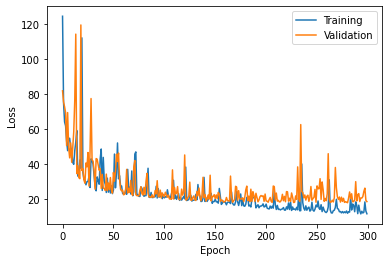

In [49]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

plot_loss(history)
plt.show()

In [50]:

performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))


2/2 [==============================] - 0s 3ms/step - loss: 19.5200

Test Loss -> 19.52


In [52]:
loaded_model=keras.models.load_model('g:/model-0281.h5')

In [53]:

performace_test = loaded_model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))


2/2 [==============================] - 0s 3ms/step - loss: 19.0607

Test Loss -> 19.06


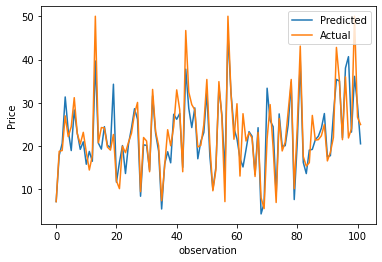

In [56]:
predicted_y = model.predict(X_test) #예측할 때는 model.predict 
plt.plot(predicted_y)
plt.plot(y_test)
plt.ylabel('Price')
plt.xlabel('observation')
plt.legend(['Predicted', 'Actual'], loc=0)

In [54]:
predicted_y = loaded_model.predict(X_test) #예측할 때는 model.predict 

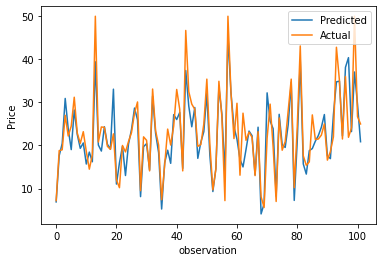

In [55]:
plt.plot(predicted_y)
plt.plot(y_test)
plt.ylabel('Price')
plt.xlabel('observation')
plt.legend(['Predicted', 'Actual'], loc=0)

In [30]:
dt=pd.read_csv('data.csv')

In [31]:
#y 로 사용될 columns 추출
y1=dt['M_10']
y2=dt['F_50']

In [32]:
#주어진 데이터에서 y로 사용된 column 들을 제외
dt = dt.drop(['M_10', 'F_50'], 1)

C:\Users\nowlo\AppData\Local\Temp/ipykernel_27240/2374454876.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dt = dt.drop(['M_10', 'F_50'], 1)


In [27]:
# dt 전처리
...


# KERAS를 이용한 신경망 구축
...


# 딥러닝 학습 및 최적의 딥러닝 모형 저장
#model.fit(....)





In [28]:
# 저장한 딥러닝 모형 불러오기
#loaded_model=keras.models.load_model('your_keras_models.h5')



In [35]:
#테스트용 데이터셋 가지고 오기
dt_for_test=pd.read_csv('data_for_test.csv')


In [36]:
#예시일뿐 실제 점검시에는 다른 데이터셋을 사용합니다.
dt_for_test

,YM,M_10,M_20,M_30,M_40,M_50,M_60,M_70,M_80,F_10,F_20,F_30,F_40,F_50,F_60,F_70,F_80
0,201611,36087,26120,84044,173002,163487,119509,53220,13614,35264,27511,131216,127008,104372,113563,51143,12466
1,201803,34272,23438,102833,185959,177797,146067,83445,22264,33918,21254,162945,143833,121685,176024,96267,22213
2,201904,45414,23917,97807,188741,176622,133519,75669,23645,44352,22852,147165,154787,119079,152152,90765,23808
3,201911,40723,31849,106284,187578,188152,144195,76607,20043,39287,32597,145019,141362,117505,133530,72768,17321
4,201912,50731,63638,126455,183364,196290,151149,79533,22226,48656,65622,175332,158342,140293,130213,70697,20169


In [37]:
#y 로 사용될 columns 추출
y1=dt_for_test['M_10']
y2=dt_for_test['F_50']
#주어진 데이터에서 y로 사용된 column 들을 제외
dt_for_test = dt_for_test.drop(['M_10', 'F_50'], 1)

# dt_for_test 전처리
...

C:\Users\nowlo\AppData\Local\Temp/ipykernel_27240/2138724362.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dt_for_test = dt_for_test.drop(['M_10', 'F_50'], 1)


Ellipsis

In [ ]:
#dt_for_test 의 전처리를 통해 모형에 넣을 값을 X_for_test로 변환하고 모형에 입력.
# 모형에도 도출된 예측값을 predicted_result로 저장
#predicted_result = loaded_model.predict(x=X_for_test)

In [39]:
# M_10에 대한 예측값, F_50에 대한 예측값 출력하고 보고할 것.
